“Design and implement a Logistic Regression model to predict whether a student will be admitted to a university based on their academic performance and profile attributes such as GRE score, TOEFL score, university rating, statement of purpose strength, letter of recommendation strength, CGPA, and research experience.”

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
data = pd.read_csv("Machine Learning/admission_prediction_cleaned.csv")

In [71]:
data.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admitted
0,328,119,1,2.9,5.0,7.08,1,0
1,318,109,2,1.2,2.8,8.76,0,1
2,304,105,4,1.3,1.2,6.66,0,0
3,332,114,3,4.4,1.2,9.17,1,1
4,297,111,3,5.0,4.0,9.81,1,1


In [20]:
data.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Admitted'],
      dtype='object')

In [94]:
features = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA','Research']
Target = 'Admitted' #1 = admitted and 0= not admitted

In [24]:
X = data[features]
Y= data[Target]

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(
    X,Y,test_size = 0.2,random_state=42,stratify = Y
)

In [41]:
model = LogisticRegression(solver='liblinear' ,class_weight = 'balanced',random_state=42)

In [43]:
model.fit(X_train,Y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [48]:
Y_pred = model.predict(X_test)

In [50]:
Y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [53]:
cm = confusion_matrix(Y_pred,Y_test)
print(cm)

[[41 14]
 [19 46]]


In [59]:
cr = classification_report(Y_pred,Y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.68      0.75      0.71        55
           1       0.77      0.71      0.74        65

    accuracy                           0.72       120
   macro avg       0.73      0.73      0.72       120
weighted avg       0.73      0.72      0.73       120



<Axes: >

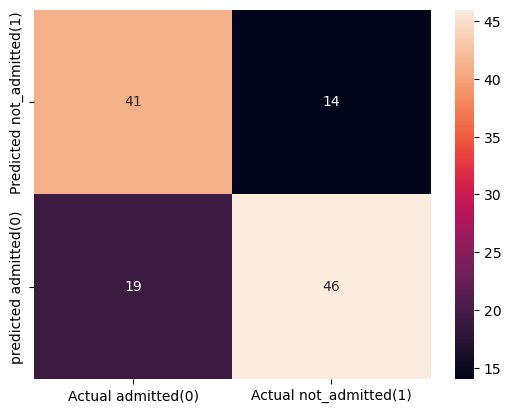

In [69]:
sns.heatmap(cm,annot =True,
           xticklabels=["Actual admitted(0)",'Actual not_admitted(1)'],
           yticklabels=['Predicted not_admitted(1)','predicted admitted(0)'])

In [73]:
new_data = {
    'GRE_Score':[200,350],
    'TOEFL_Score':[100,119],
    'University_Rating':[3,4],
    'SOP':[5.0,3.8],
    'LOR':[4,4],
    'CGPA':[6.5,9.8],
    'Research':[0,0]
}

In [81]:
X_new = pd.DataFrame(new_data)

In [83]:
X_new

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,200,100,3,5.0,4,6.5,0
1,350,119,4,3.8,4,9.8,0


In [85]:
new_pred = model.predict(X_new)

In [87]:
new_pred

array([0, 1], dtype=int64)

In [90]:
X_new['Final_Result'] = new_pred

In [92]:
X_new

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Final_Result
0,200,100,3,5.0,4,6.5,0,0
1,350,119,4,3.8,4,9.8,0,1
